In [1]:
import pandas as pd

plain = pd.read_csv("plain.csv")
unroll2 = pd.read_csv("unroll2.csv")
unroll4 = pd.read_csv("unroll4.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["unroll2"] = unroll2["time"] * 1e6
df["unroll4"] = unroll4["time"] * 1e6
df

,elements,plain,unroll2,unroll4
0,128,6.4622,6.05886,6.71774
1,256,8.0844,7.41744,8.36120
2,512,12.4130,9.89620,10.93750
3,1024,18.2785,15.60590,17.54190
4,2048,32.9529,25.20450,31.00870
5,4096,58.4076,45.62960,55.47840
6,8192,112.3360,90.83150,106.55700
7,16384,219.0860,168.76400,213.85100


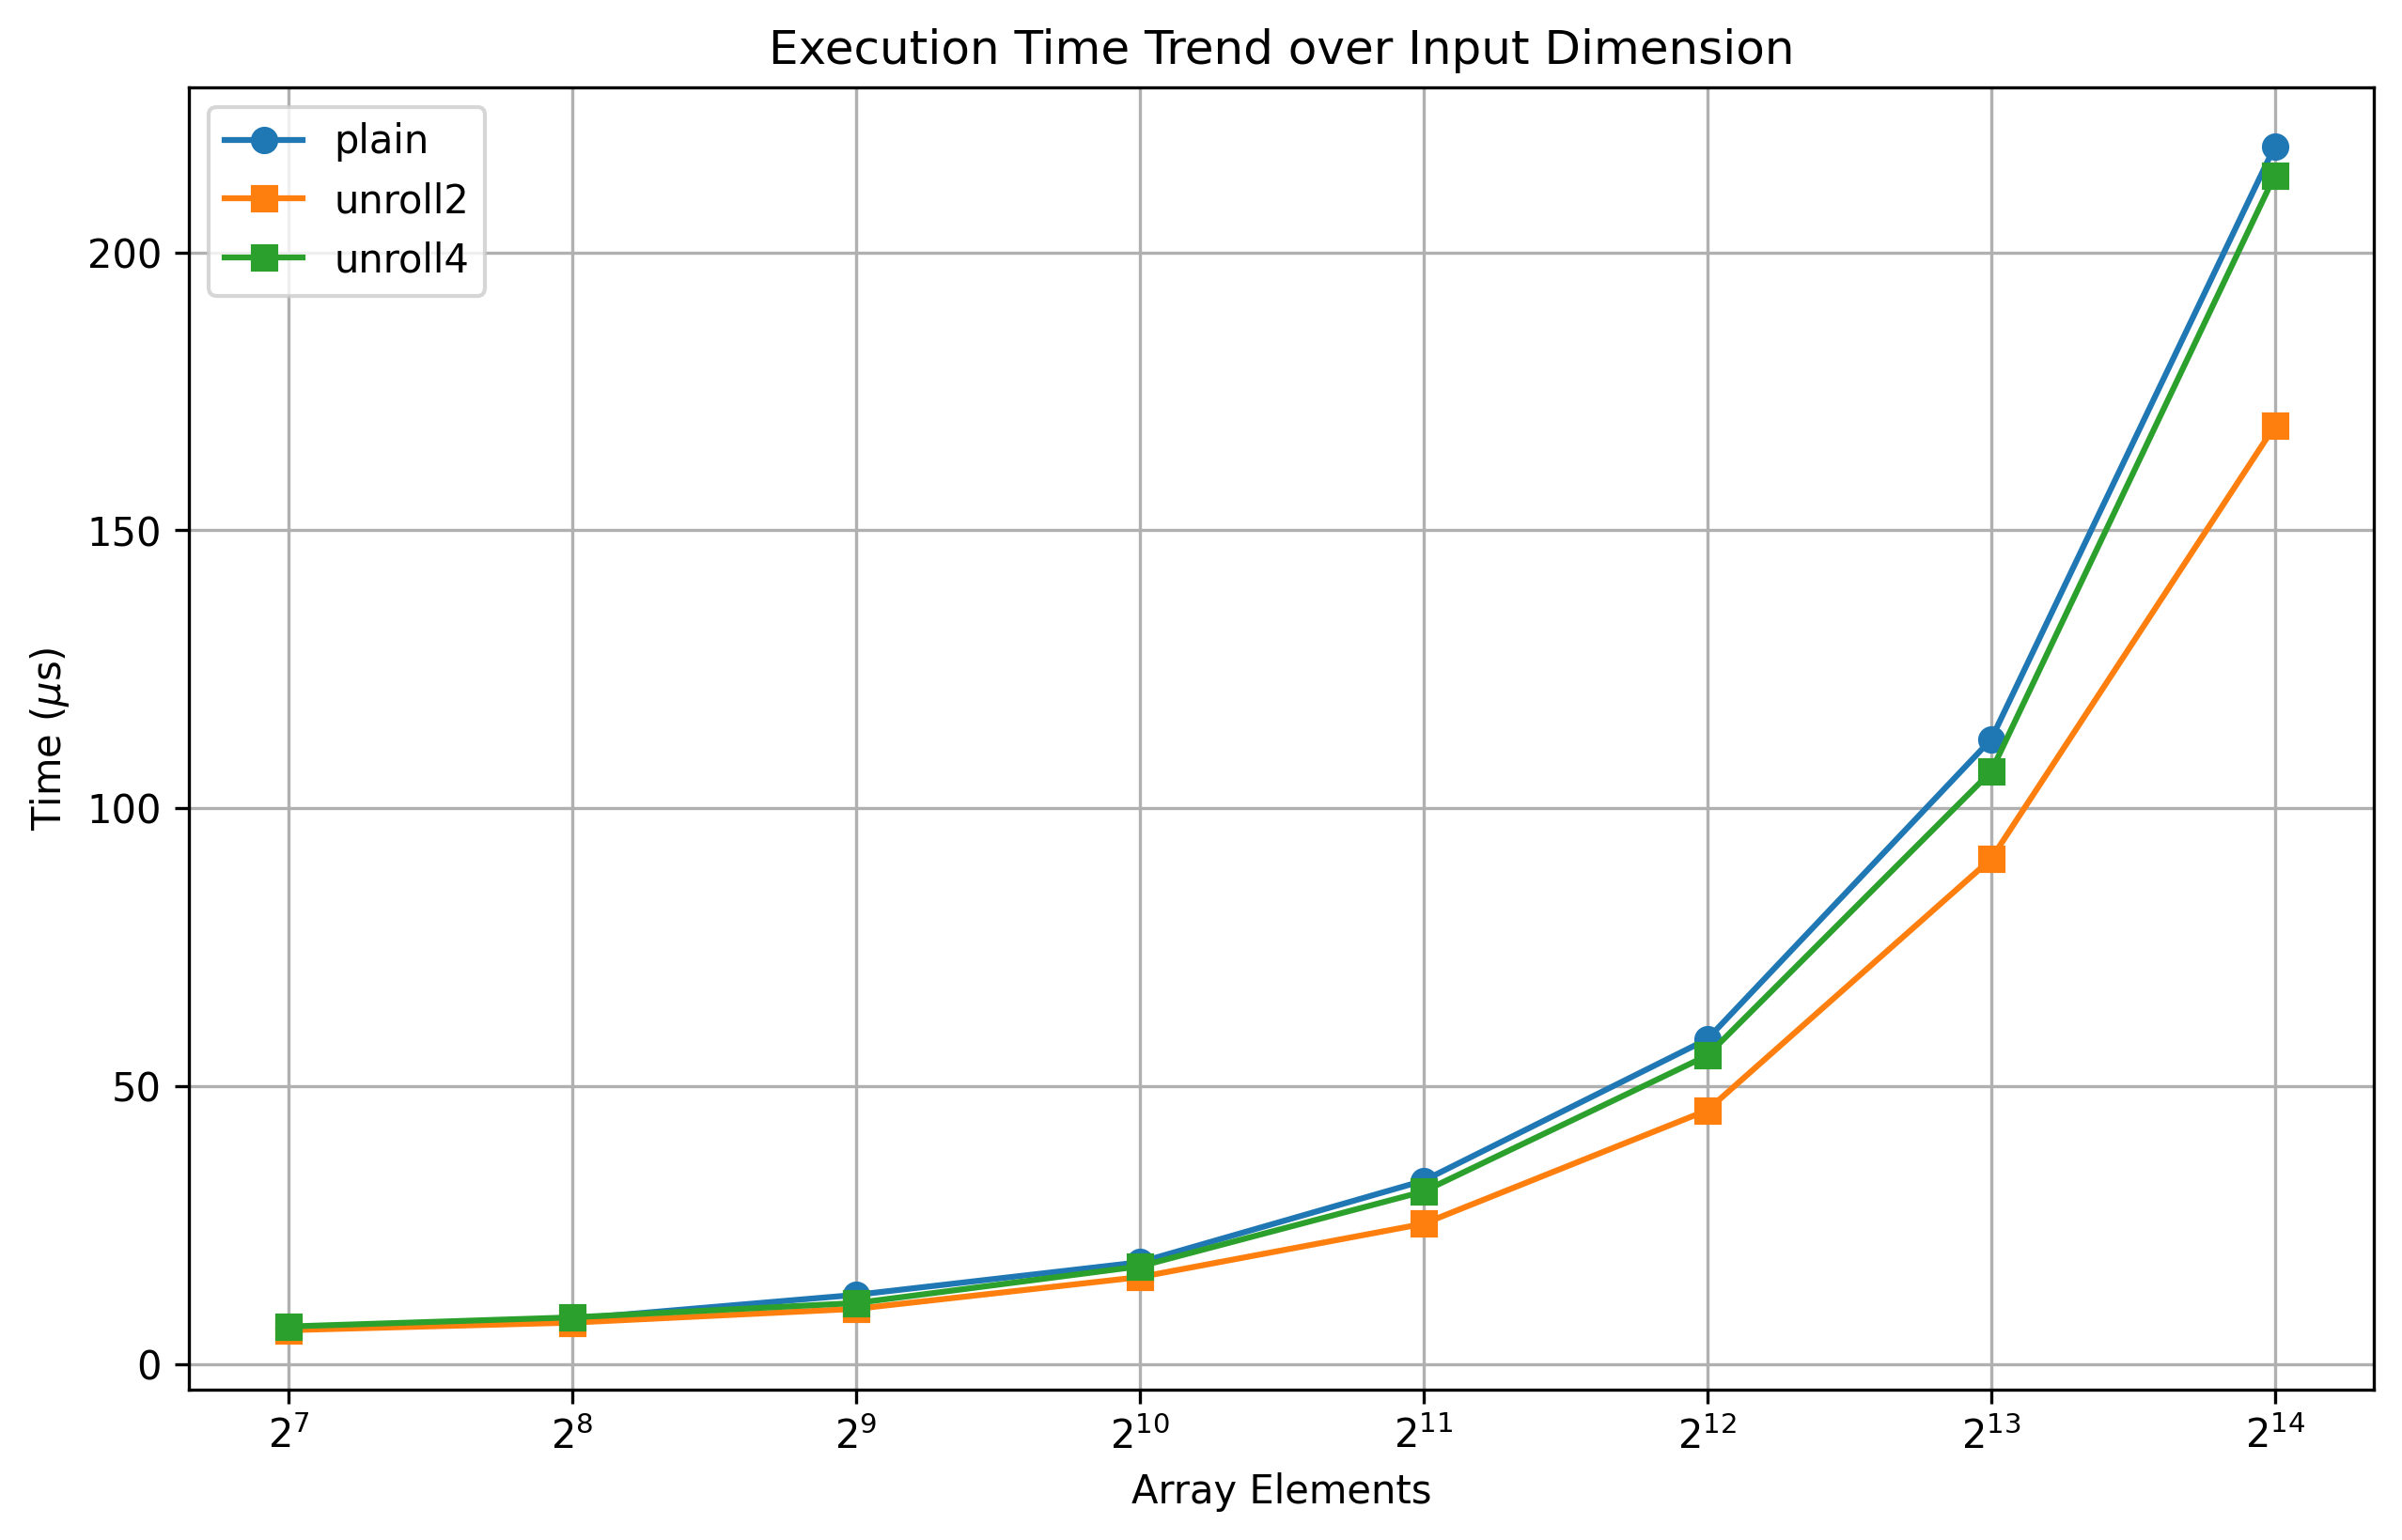

In [ ]:
import matplotlib.pyplot as plt


def plot_time(df: pd.DataFrame):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Execution Time Trend over Input Dimension")

    plt.plot(df["elements"], df["plain"], marker="o", label="plain")
    plt.plot(df["elements"], df["unroll2"], marker="s", label="unroll2")
    plt.plot(df["elements"], df["unroll4"], marker="s", label="unroll4")

    plt.xlabel("Array Elements")
    plt.ylabel(r"Time ($\mu$s)")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("time.svg")
    plt.show()


plot_time(df)

In [ ]:
df["unroll2_speedup"] = df["plain"] / df["unroll2"]
df["unroll4_speedup"] = df["plain"] / df["unroll4"]
df

,elements,plain,unroll2,unroll4,unroll2_speedup,unroll4_speedup
0,128,6.4622,6.05886,6.71774,1.066570,0.961960
1,256,8.0844,7.41744,8.36120,1.089918,0.966895
2,512,12.4130,9.89620,10.93750,1.254320,1.134903
3,1024,18.2785,15.60590,17.54190,1.171256,1.041991
4,2048,32.9529,25.20450,31.00870,1.307421,1.062699
5,4096,58.4076,45.62960,55.47840,1.280038,1.052799
6,8192,112.3360,90.83150,106.55700,1.236752,1.054234
7,16384,219.0860,168.76400,213.85100,1.298180,1.024480


In [4]:
print(
    df[["elements", "plain", "unroll2", "unroll4"]].to_latex(
        header=True, index=False, float_format="%.4f"
    )
)

\begin{tabular}{rrrr}
\toprule
elements & plain & unroll2 & unroll4 \\
\midrule
128 & 6.4622 & 6.0589 & 6.7177 \\
256 & 8.0844 & 7.4174 & 8.3612 \\
512 & 12.4130 & 9.8962 & 10.9375 \\
1024 & 18.2785 & 15.6059 & 17.5419 \\
2048 & 32.9529 & 25.2045 & 31.0087 \\
4096 & 58.4076 & 45.6296 & 55.4784 \\
8192 & 112.3360 & 90.8315 & 106.5570 \\
16384 & 219.0860 & 168.7640 & 213.8510 \\
\bottomrule
\end{tabular}



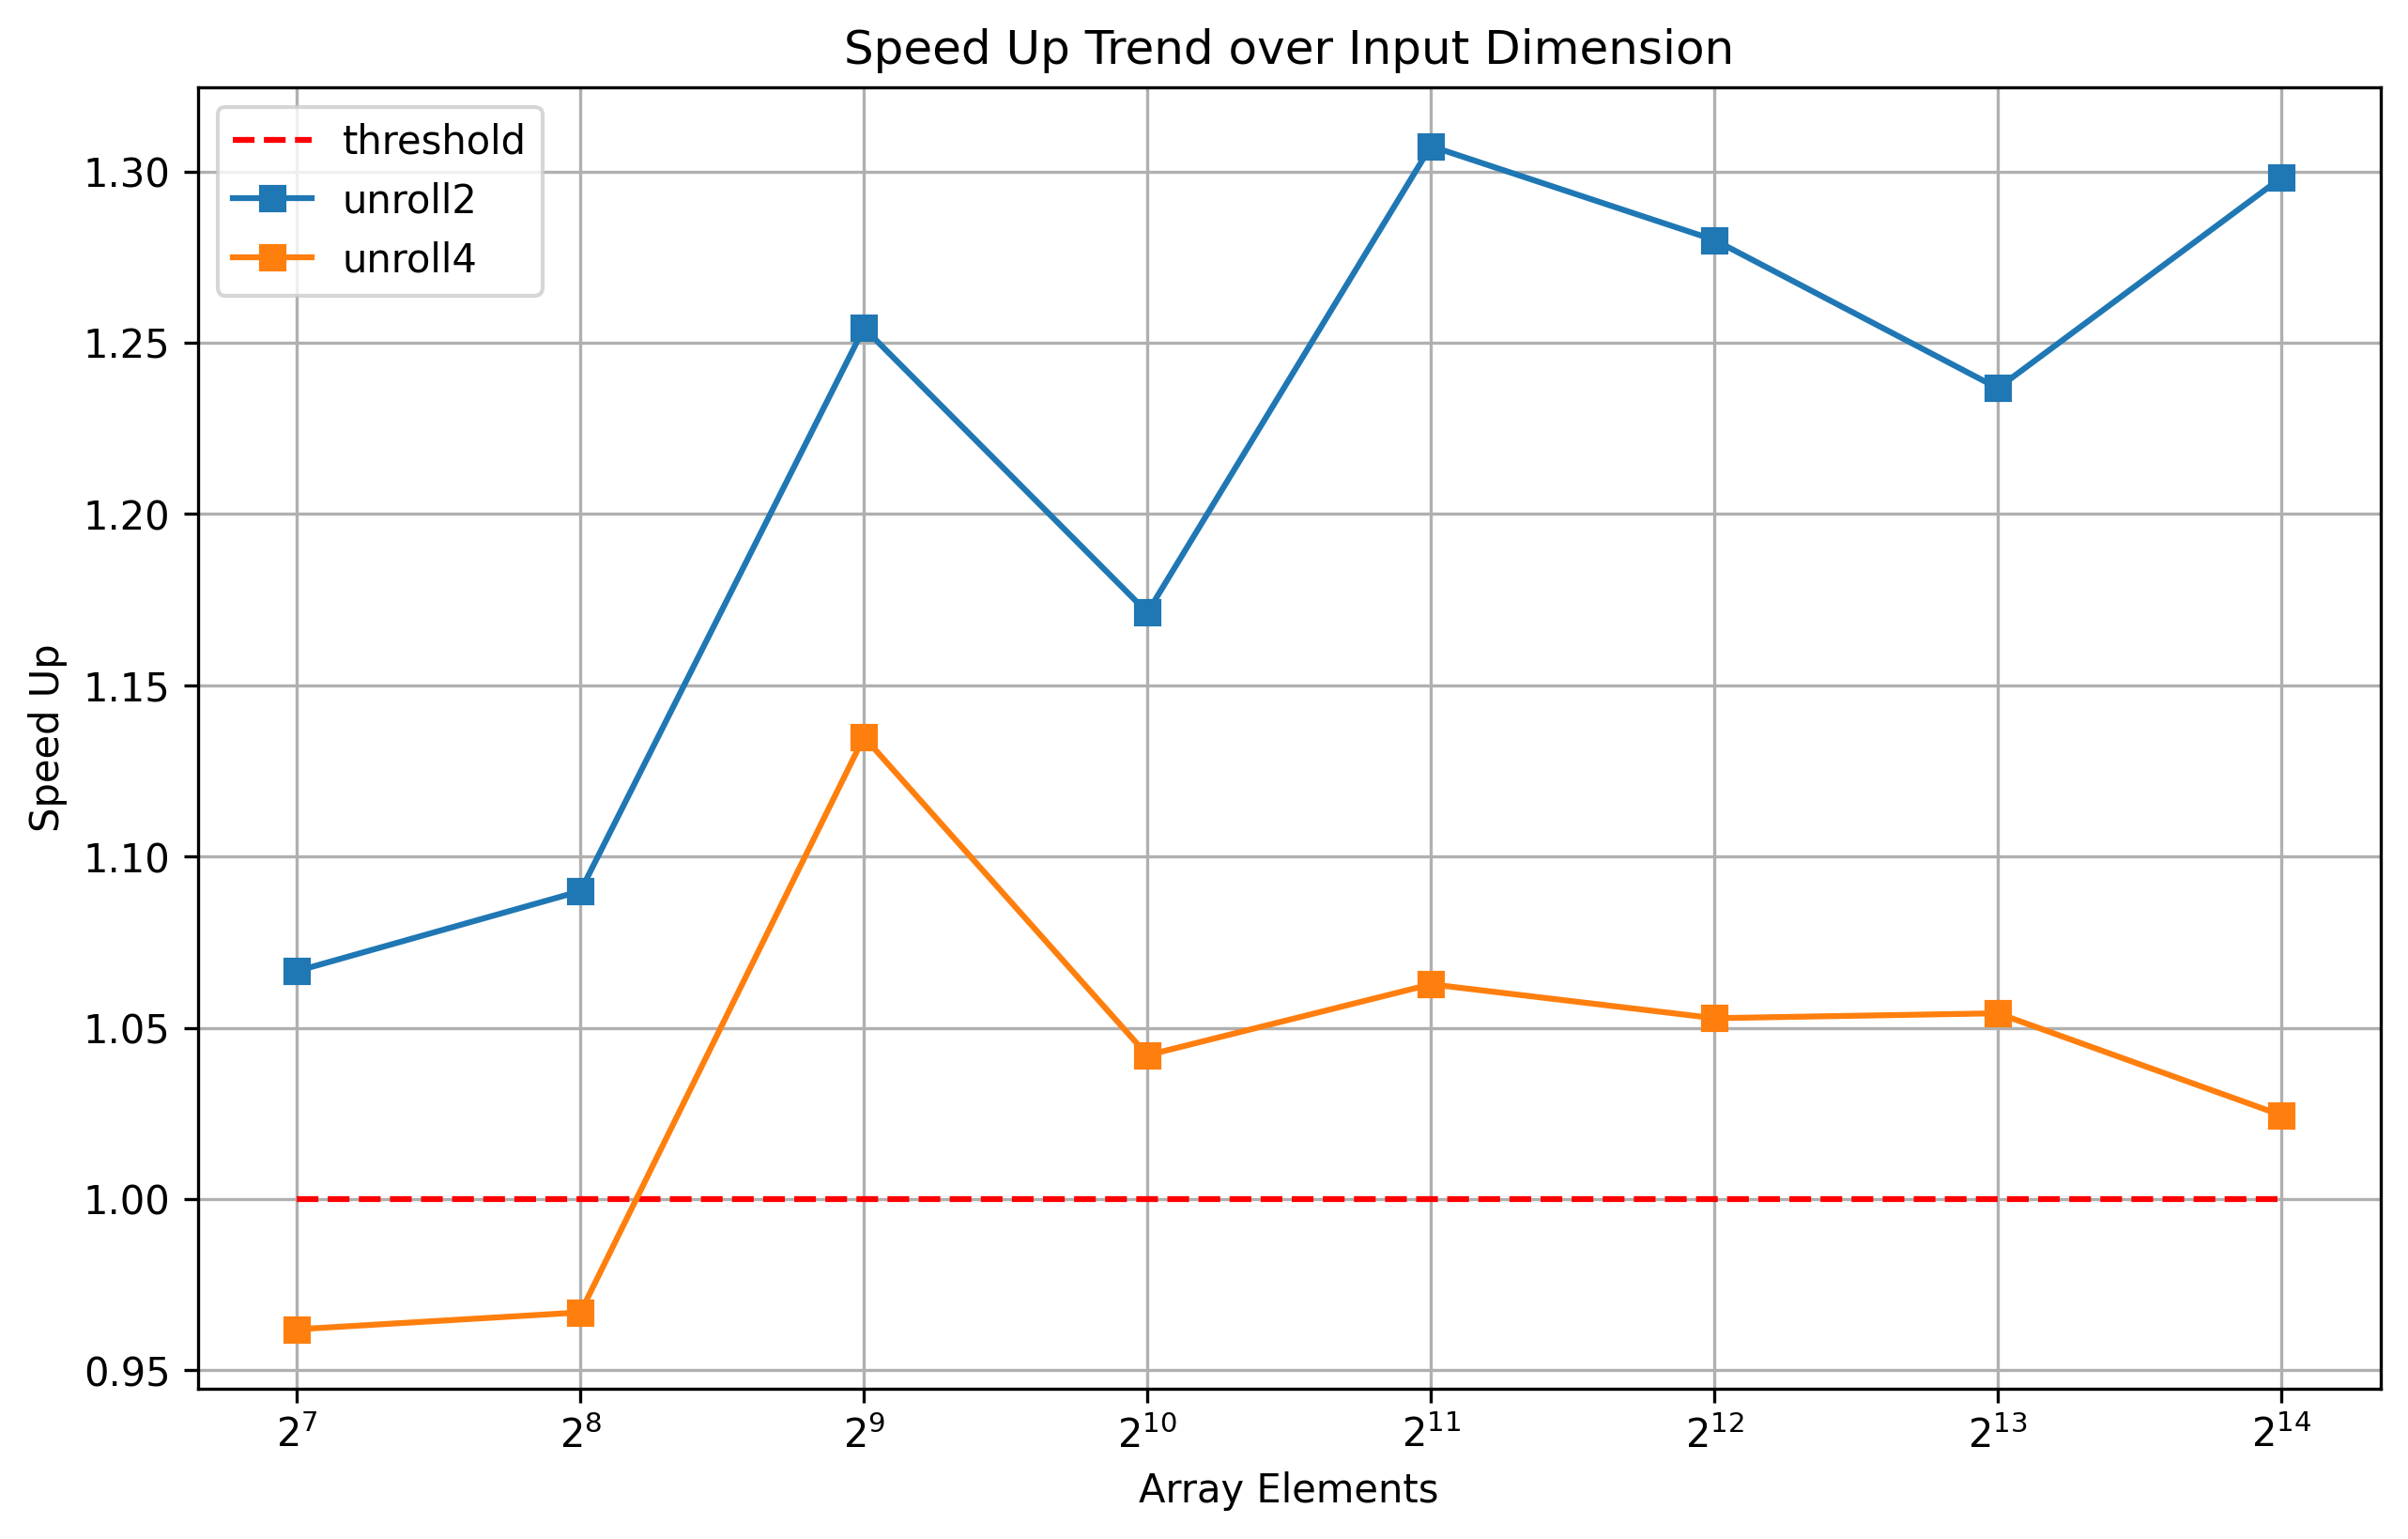

In [ ]:
def plot_speedup(df: pd.DataFrame):
    plt.figure(figsize=(10, 6), dpi=300)
    plt.title("Speed Up Trend over Input Dimension")

    # threshold of good speed up
    plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

    plt.plot(df["elements"], df["unroll2_speedup"], marker="s", label="unroll2")
    plt.plot(df["elements"], df["unroll4_speedup"], marker="s", label="unroll4")

    plt.xlabel("Array Elements")
    plt.ylabel(r"Speed Up")

    plt.xscale("log", base=2)
    plt.grid()
    plt.legend()
    plt.savefig("speed_up.svg")
    plt.show()

In [ ]:
plain = pd.read_csv("plainopt3.csv")
unroll2 = pd.read_csv("unroll2opt3.csv")
unroll4 = pd.read_csv("unroll4opt3.csv")
df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
df["unroll2"] = unroll2["time"] * 1e6
df["unroll4"] = unroll4["time"] * 1e6
df